# WP4 AUTOMATIC SUBSPACE GENERATION

## 1- Chemical File Formats

We have developed our code based on graph theory and its algorithms. In this way, in order to be easier to run our routines, we must use the sdf file format, because it contains infomation about the connections between atoms, and not just position of atoms as we may find in xyz files.

### 1.1 - Converting Between Chemical File Formats

Don't worry if you only have xyz files for your molecules. We developed a routine to convert between xyz and sdf file formats – and many other formats. We need to import the routines inside krachem.converter package as described below.

In [1]:
from krachem.converter import *

We need to define the path where our files is, and the function *molecule_converter* has three arguments: molecule path, input format, and output format. The example below converts between sdf and smi (smiles). This function automatically creates a file in which we have the converted file, as well returns a read of the file itself.

In [2]:
print('PFAS Molecule: sdf → smi:')
print(molecule_converter('files/pfas1.sdf','sdf','smi'))

PFAS Molecule: sdf → smi:
C(C(C(C(C(C(C(=O)O)(F)F)(F)F)(F)F)(F)F)(F)F)(F)(F)F	# hf/3-21g geom=connectivity



Finally, we might convert an xyz file to sdf, so we can use it to initialize our molecule and perform certain types of fragmentation schemes.

In [3]:
print('Benzene: sdf → smi:')
print(molecule_converter('files/methane.xyz','xyz','sdf'))

Benzene: sdf → smi:
# hf/3-21g geom=connectivity
 OpenBabel03042214363D

  5  4  0  0  0  0  0  0  0  0999 V2000
   -2.4501   -1.3964   -0.0183 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0935   -2.4052   -0.0183 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0935   -0.8920    0.8554 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0935   -0.8920   -0.8919 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5201   -1.3964   -0.0183 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1  5  1  0  0  0  0
  1  3  1  0  0  0  0
  4  1  1  0  0  0  0
M  END
$$$$



## 3 – Molecule Initialization

The core of our code is written inside a class called **Molecule**. Given a path of a molecule written in sdf format, we start our molecule using this class. In this way, we import this class as described below.

In [4]:
from krachem.molecule import Molecule

Finally, we run the class **Molecule**, and that's going to convert our molecule in a graph with the necessary properties, attributes, and its methods. Therefore, we start a caffeine molecule as described below, with the extra parameter *name* which is used to name some folders. **<span style="color:blue"> This is the most important action you need to perform using KraChem</span>**.

In [5]:
molecule_caffeine = Molecule('files/caffeine.sdf', name = 'caffeine')

### 3.1 - Exploring Attributes

When we initialize the molecule, we have a preprocessing so we can convert the molecule into a graph, and we get certain attributes we may explore. We have the molecule name, plus an index in case we have multiple entries of the same molecule.

In [6]:
print('Molecule Name:', 
      molecule_caffeine.name)

Molecule Name: caffeine_0


As mentioned above, we have an index for every molecule, and we have the attribute *molecule_number* in this case.

In [7]:
print('Molecule Number:', 
      molecule_caffeine.molecule_number)

Molecule Number: 0


And we have the path of the molecule as well, so we can use it inside other routines.

In [8]:
print('Molecule Path:', 
      molecule_caffeine.path)

Molecule Path: files/caffeine.sdf


Now, we can explore the components of a graph, given a molecule and its initialization. What we have are the nodes (atoms), edges (connection between atoms), and the type of bonding (single, double or single).

In [9]:
print('Molecule Atoms:\n', 
      molecule_caffeine.atoms, '\n')

print('Molecule Connections:\n', 
      molecule_caffeine.edges, '\n')

print('Bonding Types:\n', 
      molecule_caffeine.bonds, '\n')

Molecule Atoms:
 ['O', 'O', 'N', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'] 

Molecule Connections:
 [(2, 11), (3, 12), (3, 10), (4, 13), (5, 10), (6, 8), (6, 7), (6, 3), (7, 2), (7, 5), (8, 4), (8, 0), (9, 1), (9, 4), (9, 2), (10, 14), (11, 16), (11, 17), (12, 20), (13, 22), (15, 11), (18, 12), (19, 12), (21, 13), (23, 13)] 

Bonding Types:
 [1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 



We have a graph object from networkx

In [10]:
print('NetworkX Graph Object:')
molecule_caffeine.graph

NetworkX Graph Object:


and also an xyz list

In [11]:
print('XYZ List:')
display(molecule_caffeine.xyzlist)

XYZ List:


[['O', '0.4700', '2.5688', '0.0006'],
 ['O', '-3.1271', '-0.4436', '-0.0003'],
 ['N', '-0.9686', '-1.3125', '0.0000'],
 ['N', '2.2182', '0.1412', '-0.0003'],
 ['N', '-1.3477', '1.0797', '-0.0001'],
 ['N', '1.4119', '-1.9372', '0.0002'],
 ['C', '0.8579', '0.2592', '-0.0008'],
 ['C', '0.3897', '-1.0264', '-0.0004'],
 ['C', '0.0307', '1.4220', '-0.0006'],
 ['C', '-1.9061', '-0.2495', '-0.0004'],
 ['C', '2.5032', '-1.1998', '0.0003'],
 ['C', '-1.4276', '-2.6960', '0.0008'],
 ['C', '3.1926', '1.2061', '0.0003'],
 ['C', '-2.2969', '2.1881', '0.0007'],
 ['H', '3.5163', '-1.5787', '0.0008'],
 ['H', '-1.0451', '-3.1973', '-0.8937'],
 ['H', '-2.5186', '-2.7596', '0.0011'],
 ['H', '-1.0447', '-3.1963', '0.8957'],
 ['H', '4.1992', '0.7801', '0.0002'],
 ['H', '3.0468', '1.8092', '-0.8992'],
 ['H', '3.0466', '1.8083', '0.9004'],
 ['H', '-1.8087', '3.1651', '-0.0003'],
 ['H', '-2.9322', '2.1027', '0.8881'],
 ['H', '-2.9346', '2.1021', '-0.8849']]

### 3.2 - Exploring Drawing Graphs

The first method we could explore using krachem is the *draw* method. It uses networkx python package for plotting the graph, and we differentiate the atoms by colors, but we don't by type of bonding (yet). All we need to do is to get the molecule under the assigned variable, and apply the draw method as described below.

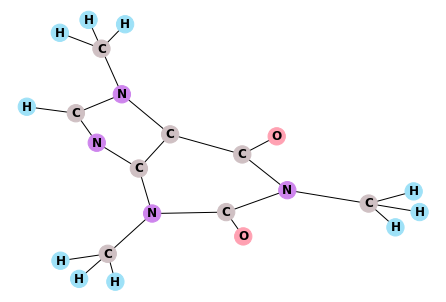

In [25]:
molecule_caffeine.draw()

Another useful routine is for plotting a subgraph, based on a list of nodes of this subgraph. In this way, we use the method *fragmentdraw* in which we add a list as input.

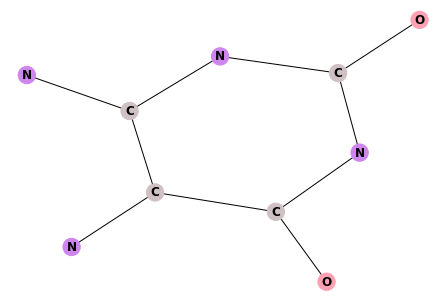

In [35]:
molecule_caffeine.fragmentdraw([0,1,2,3,4,5,6,7,8,9])

## 4 – Fragmentation Schemes

We have developed two types of fragmentation schemes: intermolecular and intramolecular. The first one considers one single molecule, and we investigate possible solution where we brake certain connections between the atoms. The second one investigates a chemical compound, in which we have more than one molecule, and we combine them into their possible combinations.

### 4.1 – Intermolecular Fragmentation

The first routine we have brakes the leaves of a graph. In this way, it brakes the connection of an atom which is connected to only other one. This function has an input for the number of leaves we want to break, and it returns all possible combinations from breaking those leaves.

In [14]:
fragments_1 = molecule_caffeine.breakingleaves(numberOfLeaves = 1)
print('Number of fragments:', len(fragments_1))

Number of fragments: 12


As we have showed above, we've got 12 combinations from breaking one leaf. We have two types of plots where we display broken bonds. The first one is *fragmentdraw* with the input of a list with the nodes inside each fragment.

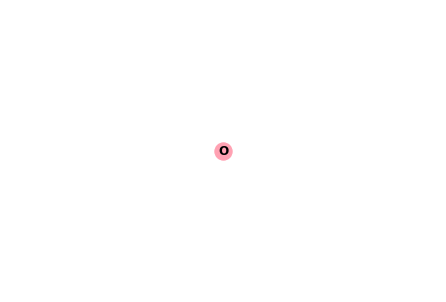

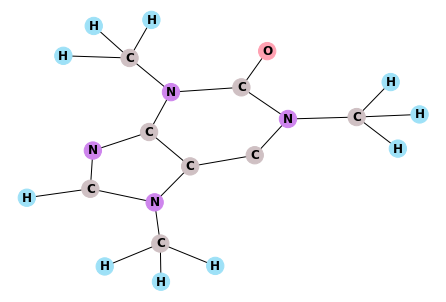

In [15]:
for x in fragments_1[0]:
    molecule_caffeine.fragmentdraw(x)

Or we can use the function *breakingdraw* which displays the whole molecule, but the bonds which is broken is colored in red.

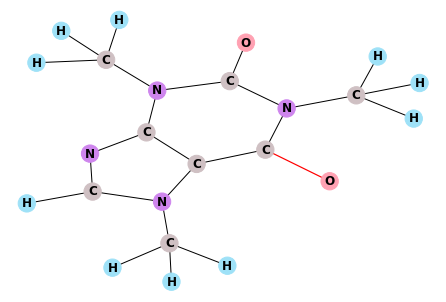

In [16]:
molecule_caffeine.breakingdraw(fragments_1[0])

As we mentioned above, we might break two leaves at a time

In [17]:
fragments_2 = molecule_caffeine.breakingleaves(numberOfLeaves = 2)
print('Number of fragments:', len(fragments_2))

Number of fragments: 66


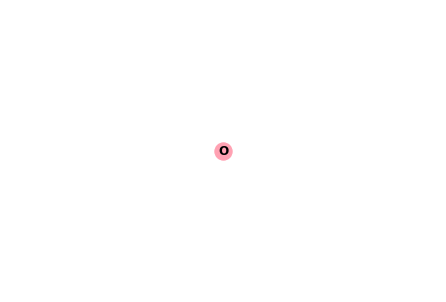

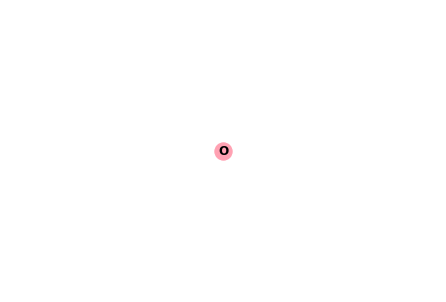

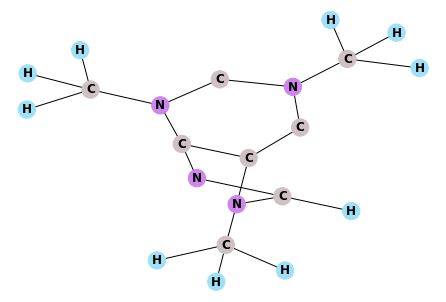

In [30]:
for x in fragments_2[0]:
    molecule_caffeine.fragmentdraw(x)

Plotting the bonds we brake using the any selected fragmentation scheme

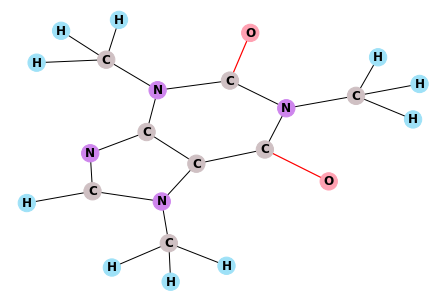

In [19]:
molecule_caffeine.breakingdraw(fragments_2[0])

Since we have the fragments and every possible combination of them, we can write them into folders and files, using the xyz format – and after that, we could even convert them into a more suitable format.

In [36]:
noc = molecule_caffeine.components2xyz(fragments_1)

### 4.2 – Intramolecular Fragmentation

In [21]:
molecule_benzene_co2 = Molecule('files/benzene_co2.sdf', name = 'benzene_co2')

In [22]:
benzene_co2_frag = molecule_benzene_co2.inter_components
print('Intermolecular Fragmentation:\n', benzene_co2_frag)

Intermolecular Fragmentation:
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [24, 29, 30], [32, 25, 31], [26, 27, 28]]


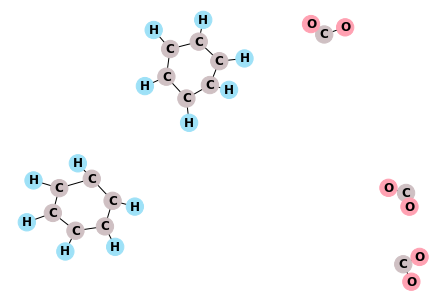

In [23]:
molecule_benzene_co2.draw()

In [37]:
molecule_benzene_co2.fragments2file()